In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fabio1079/MLOpsTools/main/mlopstools/csvdata/2021-05-14.csv", sep=";")

In [4]:
def attractiveness(commit_check, watchers, stars, forks):
    if commit_check:
        return 0.0
    return (watchers + stars + forks) / 3.0

In [5]:
ranks = []
for index, row in df.iterrows():
  rank = attractiveness(
      row['last_commit_check'],
      row['watchers_count'],
      row['stars_count'],
      row['fork_count'])
  ranks.append(rank)

In [6]:
df = df.assign(attractiveness=ranks)

In [7]:
disqualified = df.loc[df['attractiveness'] == 0]
qualified = df.loc[df['attractiveness'] > 0]

In [8]:
print("Total qualified")
print(len(qualified))
print("Total disqualified")
print(len(disqualified))

Total qualified
73
Total disqualified
5


In [9]:
disqualified

,gspread_row,use_area,tool_name,repo_owner,repo_name,main_branch,total_commits,last_commit_check,fork_count,stars_count,watchers_count,license_name,primary_language,is_archived,open_issues,closed_issues,attractiveness
4,6,AutoML,MLBox,AxeldeRomblay,MLBox,master,1121,True,254,1221,67,Other,Python,False,14,73,0.0
6,8,Cron Job Monitoring,minicron,jamesrwhite,minicron,master,1249,True,165,2344,83,GNU General Public License v3.0,Ruby,False,45,190,0.0
43,51,Model Serving,GraphPipe,oracle,graphpipe,master,29,True,108,720,57,Other,Makefile,True,12,1,0.0
45,53,Model Serving,PredictionIO,apache,attic-predictionio,develop,4495,True,2022,12508,772,Apache License 2.0,Scala,True,0,0,0.0
65,76,Visual Analysis and Debugging,Manifold,uber,manifold,master,170,True,107,1464,58,Apache License 2.0,JavaScript,False,31,36,0.0


In [10]:
qualified.describe()

,gspread_row,total_commits,fork_count,stars_count,watchers_count,open_issues,closed_issues,attractiveness
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,45.876712,3545.000000,1395.164384,6296.219178,221.520548,246.013699,816.808219,2637.634703
std,25.875742,5509.956337,3108.890933,7136.630677,325.381746,398.975928,1279.264444,3307.226327
min,2.000000,66.000000,0.000000,20.000000,1.000000,0.000000,0.000000,7.000000
25%,24.000000,638.000000,211.000000,1400.000000,49.000000,45.000000,84.000000,510.333333
50%,46.000000,1567.000000,471.000000,3764.000000,120.000000,92.000000,426.000000,1453.666667
75%,69.000000,3993.000000,1399.000000,8255.000000,269.000000,269.000000,843.000000,3275.000000
max,88.000000,30062.000000,23834.000000,38501.000000,2109.000000,2114.000000,6816.000000,18529.666667


In [11]:
use_areas = qualified['use_area'].unique()
tools_by_use_area = { k: [] for k in use_areas }

In [12]:
for area in tools_by_use_area.keys():
  tools_by_use_area[area] = qualified.loc[qualified['use_area'] == area]

for area in tools_by_use_area.keys():
  tools_by_use_area[area] = tools_by_use_area[area].sort_values(by=['attractiveness'], ascending=False)

In [13]:
def plot_area(area, use_area):
  labels = area['tool_name']
  values = area['attractiveness']

  fig, ax = plt.subplots()
  ax.barh(labels, values, align='center')
  ax.set_xlabel("Atratividade")
  ax.set_title(use_area)

  plt.show()

In [14]:
use_areas

array(['AutoML', 'CI/CD ', 'Cron Job Monitoring', 'Data Exploration',
       'Data Management', 'Data Processing', 'Data Validation',
       'Data Visualization', 'Feature Store', 'Hyperparameter Tuning',
       'Model Interpretability', 'Model Lifecycle', 'Model Serving',
       'Optimization Tools', 'Simplification Tools',
       'Visual Analysis and Debugging', 'Workflow Tools'], dtype=object)

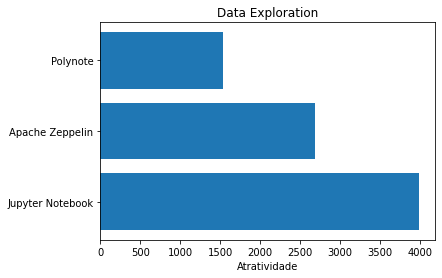

In [15]:
plot_area(tools_by_use_area['Data Exploration'], 'Data Exploration')

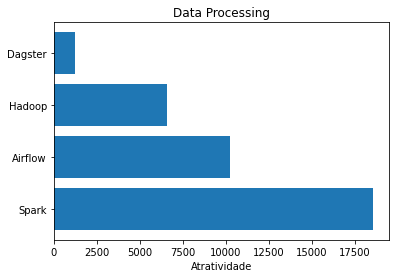

In [16]:
plot_area(tools_by_use_area['Data Processing'], 'Data Processing')

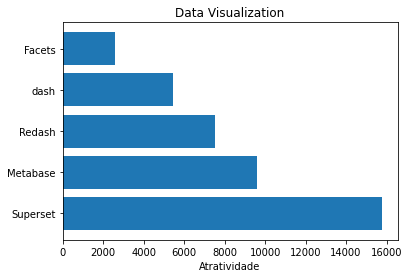

In [17]:
plot_area(tools_by_use_area['Data Visualization'], 'Data Visualization')

In [18]:
mlops_monitoring = pd.concat([tools_by_use_area['Cron Job Monitoring'], tools_by_use_area['Model Lifecycle'], tools_by_use_area['Visual Analysis and Debugging']])

In [19]:
mlops_monitoring.describe()

,gspread_row,total_commits,fork_count,stars_count,watchers_count,open_issues,closed_issues,attractiveness
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,49.142857,1959.857143,759.428571,5262.857143,123.857143,152.142857,434.857143,2048.714286
std,23.448017,1257.549393,780.390684,4842.055398,94.448273,207.093722,356.821351,1882.001618
min,9.000000,788.000000,55.000000,1209.000000,11.000000,24.000000,40.000000,503.333333
25%,43.500000,1079.000000,277.000000,2344.500000,76.000000,72.000000,186.000000,891.000000
50%,46.000000,1675.000000,471.000000,3443.000000,92.000000,79.000000,405.000000,1282.666667
75%,62.000000,2368.000000,1104.000000,6548.000000,171.500000,100.000000,576.000000,2659.333333
max,78.000000,4362.000000,2028.000000,14403.000000,269.000000,618.000000,1075.000000,5454.333333


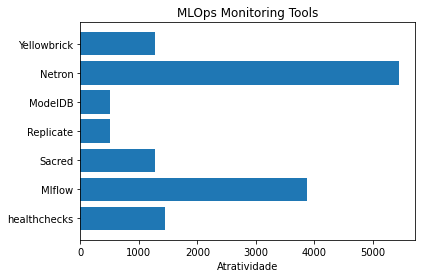

In [20]:
plot_area(mlops_monitoring, 'MLOps Monitoring Tools')